### Introduction
This project analyzes the Uber Ride Analytics Dataset (2024), which contains 150,000 ride bookings across multiple vehicle types. The dataset covers customer behavior, cancellations, financial metrics, and satisfaction ratings, offering a 360° view of ride-sharing operations.


### Core Goals
1. Predict Fare (booking_value) for completed rides with production-grade accuracy.
2. Explain fare drivers: distance, vehicle type, hour/DoW, pickup–drop lanes, and demand pressure (VTAT/CTAT).
3. Operational levers: identify when/where fares surge vs. underprice, and what to change (routing, supply balancing, category pricing).

## Data Schema

| Column Name                        | Description                                                                 |
|------------------------------------|-----------------------------------------------------------------------------|
| Date                               | Date of the booking                                                         |
| Time                               | Time of the booking                                                         |
| Booking ID                         | Unique identifier for each ride booking                                     |
| Booking Status                     | Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.) |
| Customer ID                        | Unique identifier for customers                                             |
| Vehicle Type                       | Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan) |
| Pickup Location                    | Starting location of the ride                                               |
| Drop Location                      | Destination location of the ride                                            |
| Avg VTAT                           | Average Vehicle Time at Arrival                                             |
| Avg CTAT                           | Average Customer Time at Arrival                                            |
| Cancelled Rides by Customer        | Customer-initiated cancellation flag                                        |
| Reason for cancelling by Customer  | Reason for customer cancellation                                            |
| Cancelled Rides by Driver          | Driver-initiated cancellation flag                                          |
| Driver Cancellation Reason         | Reason for driver cancellation                                              |
| Incomplete Rides                   | Incomplete ride flag                                                        |
| Incomplete Rides Reason            | Reason for incomplete rides                                                 |
| Booking Value                      | Total fare amount for the ride                                              |
| Ride Distance                      | Distance covered during the ride (in km)                                    |
| Driver Ratings                     | Rating given to driver (1–5 scale)                                          |
| Customer Rating                    | Rating given by customer (1–5 scale)                                        |
| Payment Method                     | Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card)   |


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings; warnings.filterwarnings("ignore")


In [87]:
data = pd.read_csv('data.csv')
data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [88]:
data.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [89]:
data.tail(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149990,2024-09-26,12:31:22,"""CNR3212810""",Cancelled by Driver,"""CID6199171""",Auto,Kashmere Gate ISBT,GTB Nagar,10.7,NaN,...,NaN,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149991,2024-07-13,14:47:30,"""CNR5591053""",Completed,"""CID1829616""",Auto,Karol Bagh,Vishwavidyalaya,11.2,30.8,...,NaN,NaN,NaN,NaN,NaN,597.0,27.91,4.2,4.3,UPI
149992,2024-01-24,18:02:28,"""CNR1717894""",No Driver Found,"""CID9564749""",Go Mini,Nehru Place,Aya Nagar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149993,2024-05-03,11:18:17,"""CNR9715958""",Completed,"""CID8835432""",Go Mini,Tughlakabad,Jama Masjid,13.2,20.1,...,NaN,NaN,NaN,NaN,NaN,280.0,29.89,4.1,4.7,Cash
149994,2024-06-14,16:46:53,"""CNR9572383""",Completed,"""CID2952237""",Go Mini,Akshardham,Greater Noida,8.2,30.6,...,NaN,NaN,NaN,NaN,NaN,388.0,10.51,4.3,4.9,UPI
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [91]:
data.describe()


,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [92]:
data.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

Most of the missing values aren’t random errors, they’re structural.
- Booking Value, Ride Distance, and Payment Method are missing mainly when rides weren’t completed.
- Ratings are missing because not every ride gets rated.
- The cancellation and incomplete flags (Cancelled Rides by Customer/Driver, Incomplete Rides) are redundant; they just echo what’s already in Booking Status.
-
Booking Status is the key column — it tells us whether a ride was completed, cancelled, or failed, and the missing values in other fields usually follow from that.

Our next step is to break down these missing patterns by booking status to confirm the cause.

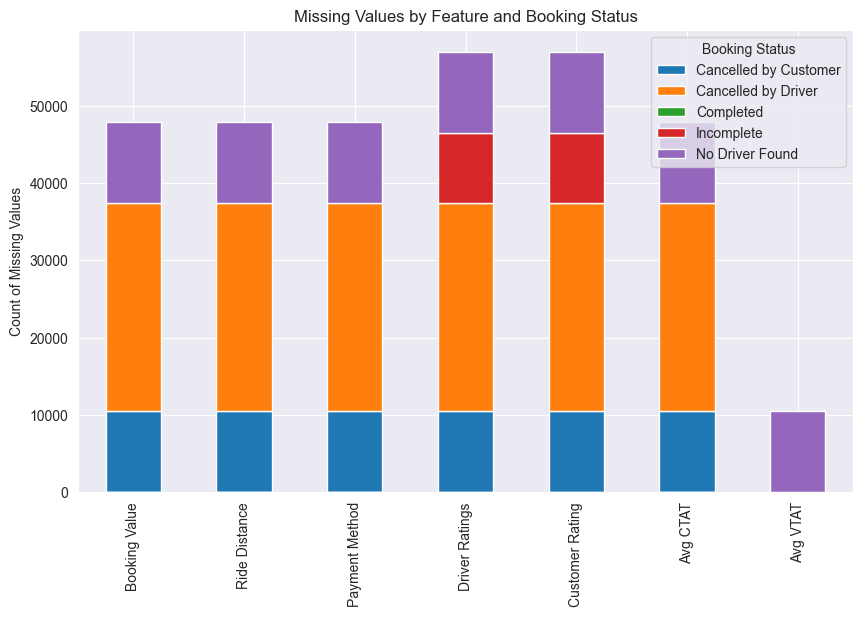

In [93]:
missing_by_status = data.groupby("Booking Status")[["Booking Value","Ride Distance",
                                                    "Payment Method","Driver Ratings",
                                                    "Customer Rating","Avg CTAT","Avg VTAT"]].apply(lambda x: x.isna().sum())

missing_by_status.T.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Missing Values by Feature and Booking Status")
plt.ylabel("Count of Missing Values")
plt.show()

The chart shows that missing values are directly tied to ride outcomes.
- Completed rides: no missing data.
- Cancelled rides (customer/driver): fare, distance, payment, and ratings always missing; only VTAT is recorded.
- No Driver Found:  everything missing.
- Incomplete rides: fare and distance present, but ratings missing.

This confirms missingness is structural, not random, and fully explained by Booking Status.

In [94]:
data.duplicated().sum()

0

In [95]:
data["datetime"] = pd.to_datetime(data["Date"] + " " + data["Time"], errors="coerce")

# Drop old columns if you don’t need them
data = data.drop(columns=["Date", "Time"])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Booking ID                         150000 non-null  object        
 1   Booking Status                     150000 non-null  object        
 2   Customer ID                        150000 non-null  object        
 3   Vehicle Type                       150000 non-null  object        
 4   Pickup Location                    150000 non-null  object        
 5   Drop Location                      150000 non-null  object        
 6   Avg VTAT                           139500 non-null  float64       
 7   Avg CTAT                           102000 non-null  float64       
 8   Cancelled Rides by Customer        10500 non-null   float64       
 9   Reason for cancelling by Customer  10500 non-null   object        
 10  Cancelled Rides by D

In [97]:
def to_snake_case(columns):
    snake_cols = []
    for col in columns:
        # Strip spaces, make lowercase
        col = col.strip().lower()
        # Replace spaces, dashes, and slashes with underscores
        col = re.sub(r'[\s\-\/]+', '_', col)
        # Remove anything not alphanumeric or underscore
        col = re.sub(r'[^\w]', '', col)
        # Collapse multiple underscores
        col = re.sub(r'_+', '_', col)
        # Remove leading/trailing underscores
        col = col.strip('_')
        snake_cols.append(col)
    return snake_cols

In [98]:
data.columns = to_snake_case(data.columns)

In [99]:
data.columns

Index(['booking_id', 'booking_status', 'customer_id', 'vehicle_type',
       'pickup_location', 'drop_location', 'avg_vtat', 'avg_ctat',
       'cancelled_rides_by_customer', 'reason_for_cancelling_by_customer',
       'cancelled_rides_by_driver', 'driver_cancellation_reason',
       'incomplete_rides', 'incomplete_rides_reason', 'booking_value',
       'ride_distance', 'driver_ratings', 'customer_rating', 'payment_method',
       'datetime'],
      dtype='object')

### EDA

##### Goals of EDA
- Booking Outcomes: distribution of completed vs. cancelled vs. incomplete rides.
- Cancellations: breakdown by driver vs. customer, and reasons where available.
- Fares & Distances: relationship between ride distance and booking value; fare consistency across vehicle types.
- Customer & Driver Ratings: average ratings, rating distributions, and link to cancellations.
- Payment Methods: usage trends and link to ride completion.
- Time-based Analysis: peak booking hours, weekday vs weekend patterns, monthly trends.
- Location Insights: common pickup/drop hotspots.

##### Outcome of EDA
A clear picture of booking behaviors, cancellation drivers, and revenue patterns. Setting the foundation for predictive modeling

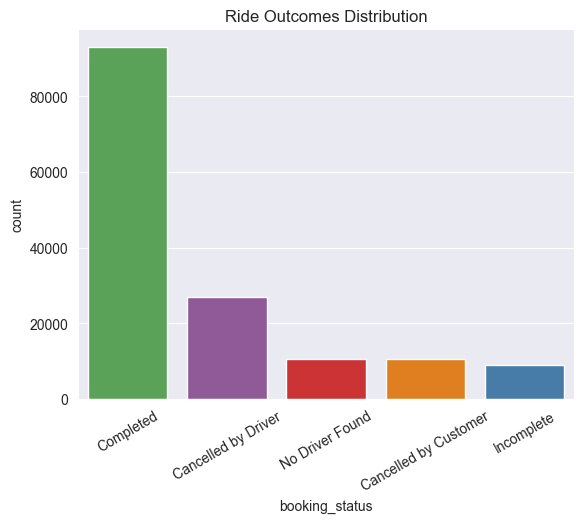

In [100]:
sns.countplot(x="booking_status", data=data, order=data["booking_status"].value_counts().index, palette='Set1', hue="booking_status")
plt.title("Ride Outcomes Distribution")
plt.xticks(rotation=30)
plt.show()

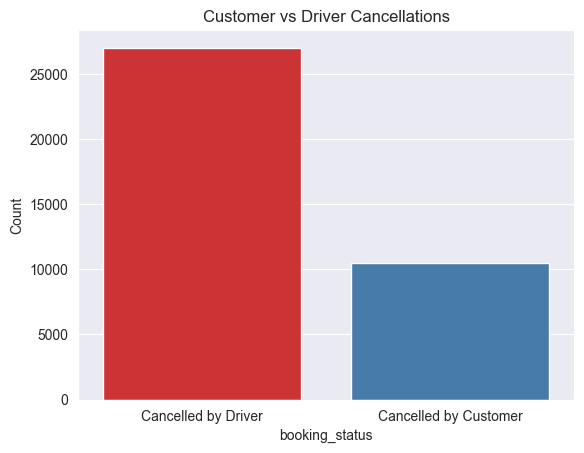

In [101]:
cancel_data = data[data["booking_status"].isin(["Cancelled by Customer", "Cancelled by Driver"])]

ax = sns.countplot(
    x="booking_status",
    data=cancel_data,
    order=cancel_data["booking_status"].value_counts().index,
    palette="Set1",
    hue="booking_status"
)

plt.title("Customer vs Driver Cancellations")
plt.ylabel("Count")
plt.show()

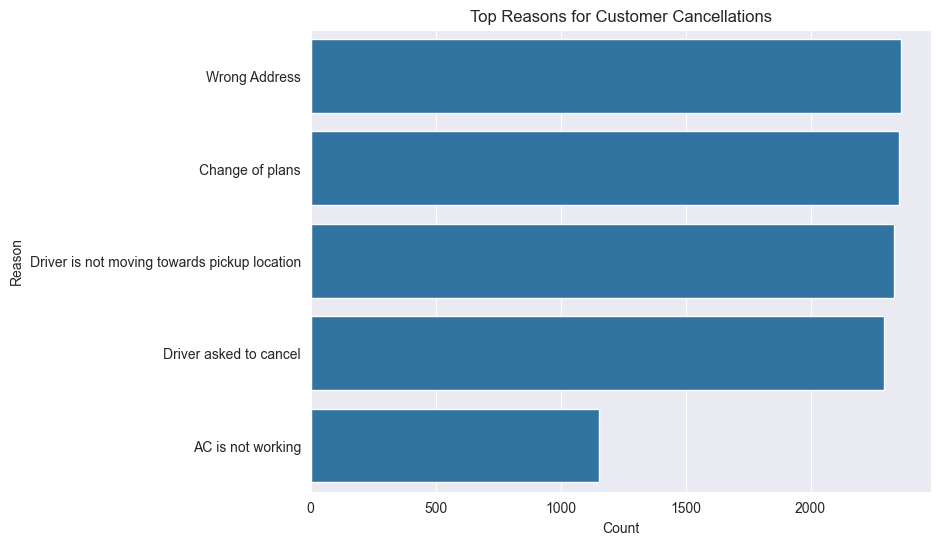

In [102]:
cust_reasons = data["reason_for_cancelling_by_customer"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=cust_reasons.values, y=cust_reasons.index)
plt.title("Top Reasons for Customer Cancellations")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

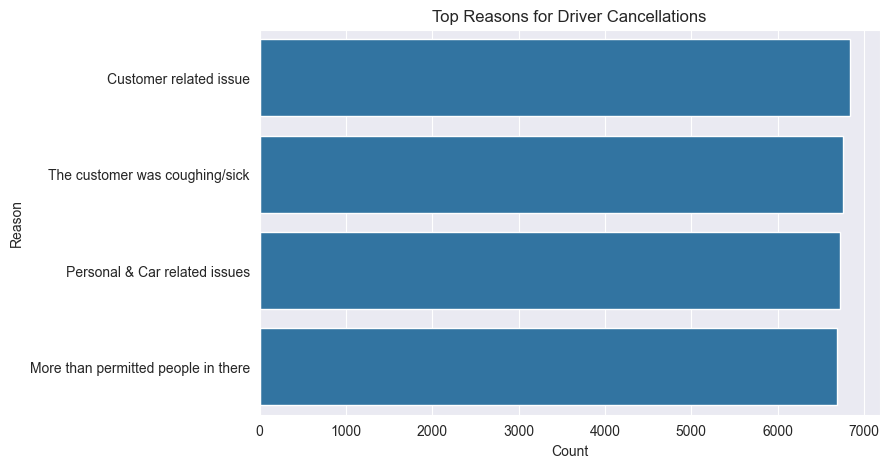

In [103]:
driver_reasons = data["driver_cancellation_reason"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=driver_reasons.values, y=driver_reasons.index)
plt.title("Top Reasons for Driver Cancellations")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

#### Cancellations Insights
- Drivers cancel more often (≈2.5x customers): supply-side issue hurting reliability.
- Customer cancellations mostly caused by driver unreliability (wrong address, driver not moving, driver asked to cancel).
- Driver cancellations driven by compliance/personal issues (too many passengers, sick customer, vehicle/personal problems).

Bottom line: cancellations are primarily driver-driven, and customer cancellations are often a reaction to poor driver behavior.

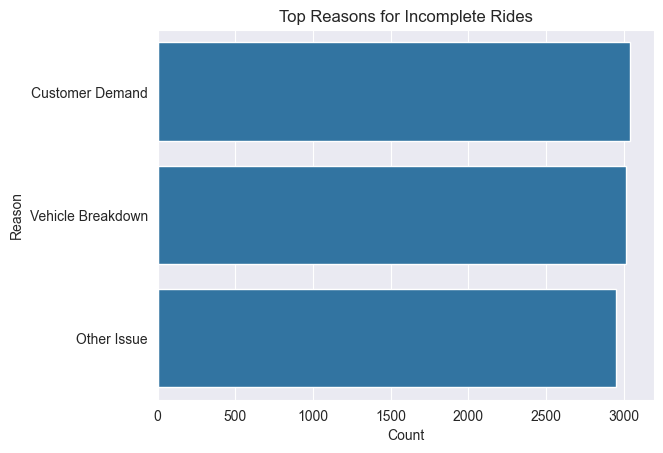

In [104]:
incomplete = data[data["booking_status"] == "Incomplete"]
incomplete_reasons = incomplete["incomplete_rides_reason"].value_counts().head(10)


sns.barplot(x=incomplete_reasons.values, y=incomplete_reasons.index)
plt.title("Top Reasons for Incomplete Rides")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

Incomplete rides are rare but mainly caused by customer-initiated dropouts, vehicle breakdowns, and miscellaneous operational issues, making them a smaller yet high-impact source of lost trust and revenue.

In [105]:
completed = data[data["booking_status"] == "Completed"]

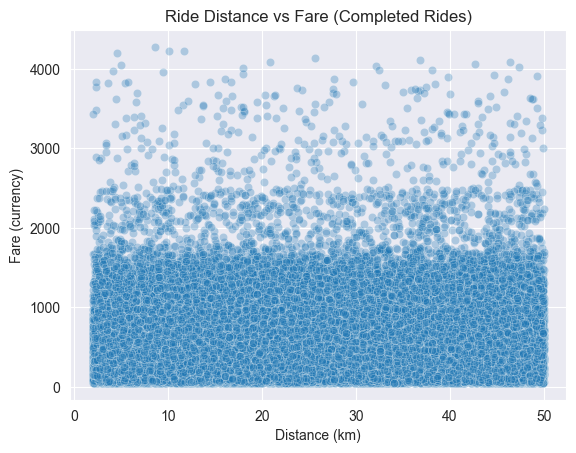

In [106]:
sns.scatterplot(x="ride_distance", y="booking_value", data=completed, alpha=0.3)
plt.title("Ride Distance vs Fare (Completed Rides)")
plt.xlabel("Distance (km)")
plt.ylabel("Fare (currency)")
plt.show()

In [107]:
corr = completed[["ride_distance", "booking_value"]].corr()
print(corr)

               ride_distance  booking_value
ride_distance       1.000000       0.005668
booking_value       0.005668       1.000000


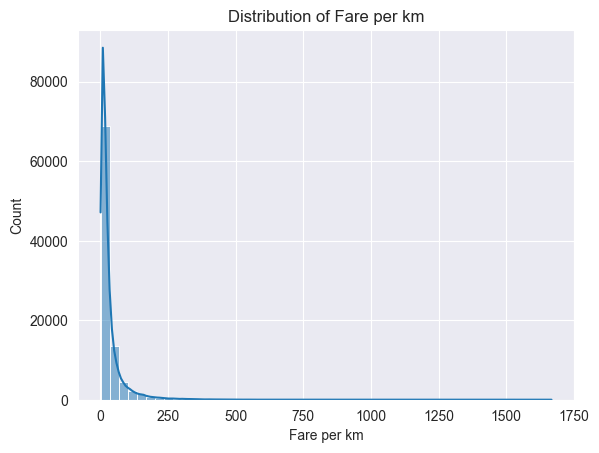

In [108]:
completed = data[data["booking_status"] == "Completed"].copy()
completed["fare_per_km"] = completed["booking_value"] / completed["ride_distance"]

sns.histplot(completed["fare_per_km"], bins=50, kde=True)
plt.title("Distribution of Fare per km")
plt.xlabel("Fare per km")
plt.show()

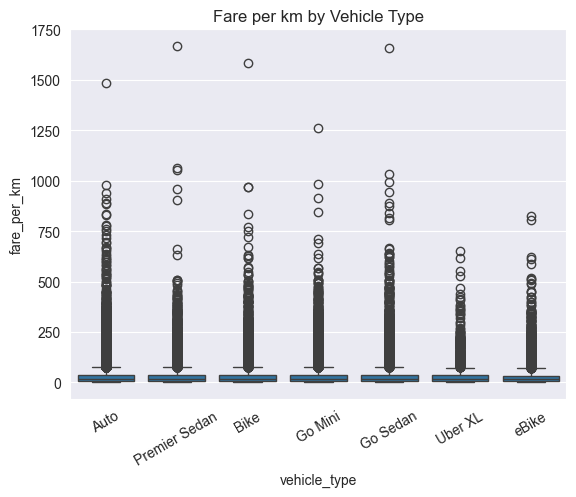

In [109]:
sns.boxplot(x="vehicle_type", y="fare_per_km", data=completed)
plt.title("Fare per km by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

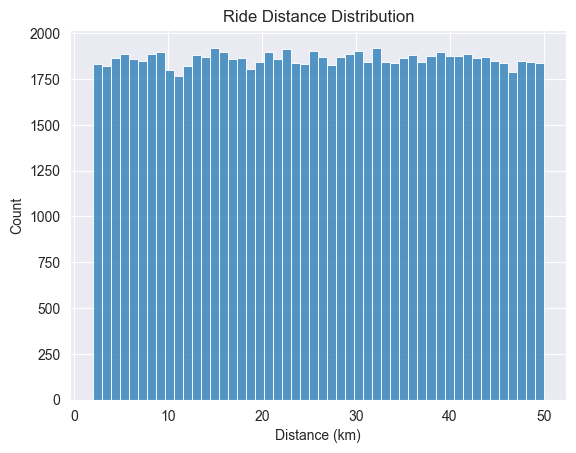

In [110]:
sns.histplot(completed["ride_distance"], bins=50)
plt.title("Ride Distance Distribution")
plt.xlabel("Distance (km)")
plt.show()

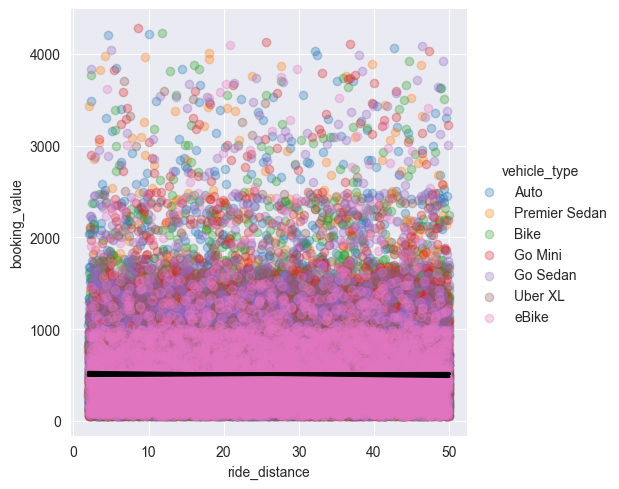

In [111]:
sns.lmplot(x="ride_distance", y="booking_value", hue="vehicle_type", data=completed, scatter_kws={'alpha':0.3}, line_kws={'color':'black'})


Fares scale with distance but with big variability caused by vehicle type, surge pricing, or anomalies.
Fare-per-km analysis highlights pricing inconsistencies and extreme outliers.
Distance distribution looks artificially uniform — needs verification.

Next step is to segment by vehicle type, time, and location to isolate the causes of pricing spread.

In [112]:
completed["ride_distance"].describe()


count    93000.000000
mean        26.000493
std         13.824176
min          2.000000
25%         14.100000
50%         26.020000
75%         37.942500
max         50.000000
Name: ride_distance, dtype: float64

In [113]:
completed["ride_distance_round"] = completed["ride_distance"].round(1)
completed["ride_distance_round"].value_counts().head(10)

ride_distance_round
21.0    253
40.6    249
41.8    247
16.4    246
46.2    243
23.8    242
37.6    241
39.2    240
32.6    239
35.2    238
Name: count, dtype: int64

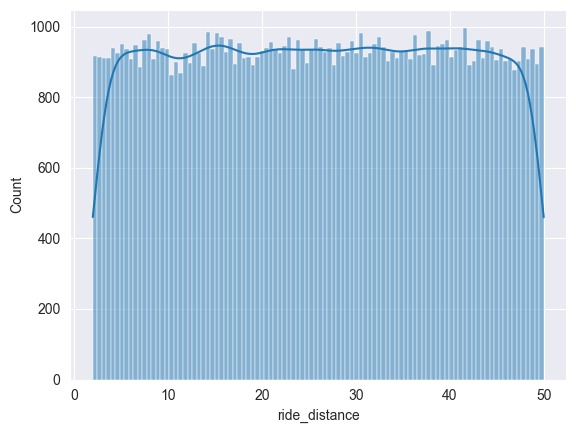

KstestResult(statistic=0.0023844086021505284, pvalue=0.6647769776157633, statistic_location=0.24375, statistic_sign=-1)

In [114]:
sns.histplot(completed["ride_distance"], bins=100, kde=True); plt.show()

import scipy.stats as st
st.kstest((completed["ride_distance"]-completed["ride_distance"].min())/
          (completed["ride_distance"].max()-completed["ride_distance"].min()),
          'uniform')

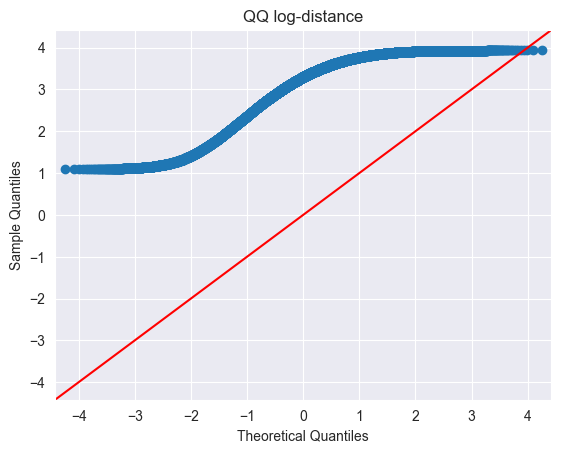

In [115]:
import statsmodels.api as sm
sm.qqplot(np.log1p(completed["ride_distance"]), line="45"); plt.title("QQ log-distance"); plt.show()

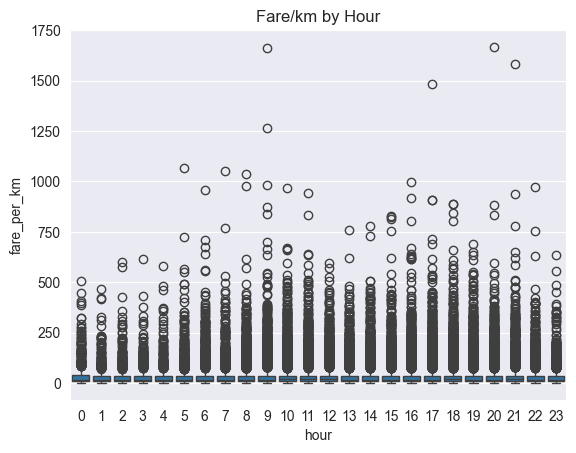

In [116]:
completed["hour"] = completed["datetime"].dt.hour
sns.boxplot(x="hour", y="fare_per_km", data=completed); plt.title("Fare/km by Hour"); plt.show()


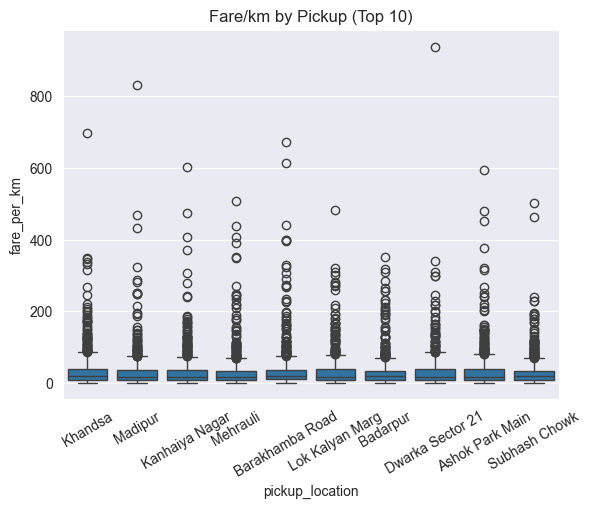

In [117]:
top_pu = completed["pickup_location"].value_counts().head(10).index
sns.boxplot(x="pickup_location", y="fare_per_km",
            data=completed[completed["pickup_location"].isin(top_pu)])
plt.xticks(rotation=30); plt.title("Fare/km by Pickup (Top 10)"); plt.show()

Ride distances look unnaturally uniform.
That’s a data-quality smell—verify generation/rounding and then segment by vehicle type, hour, and pickup area to explain fare spread.

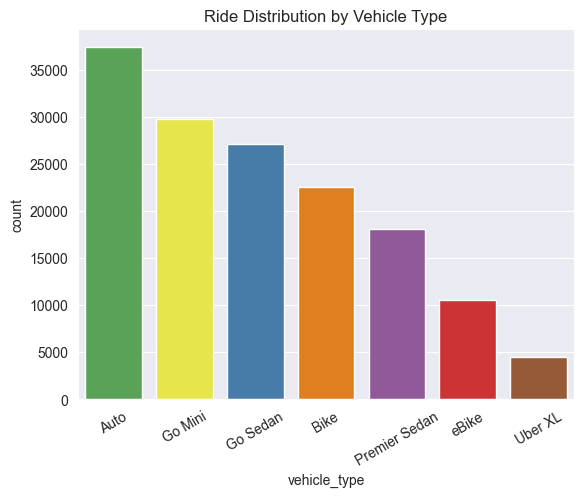

In [118]:
sns.countplot(x="vehicle_type", data=data, order=data["vehicle_type"].value_counts().index, palette="Set1", hue="vehicle_type")
plt.title("Ride Distribution by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

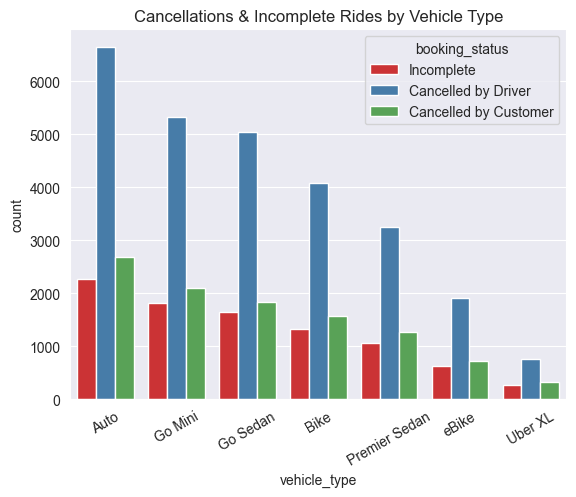

In [119]:
sns.countplot(x="vehicle_type", hue="booking_status",
              data=data[data["booking_status"].isin(["Cancelled by Driver","Cancelled by Customer","Incomplete"])],
              order=data["vehicle_type"].value_counts().index, palette="Set1")
plt.title("Cancellations & Incomplete Rides by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

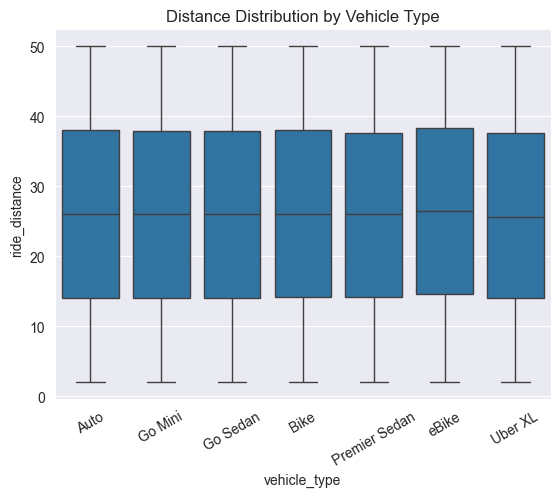

In [120]:
sns.boxplot(x="vehicle_type", y="ride_distance", data=completed, order=completed["vehicle_type"].value_counts().index)
plt.title("Distance Distribution by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

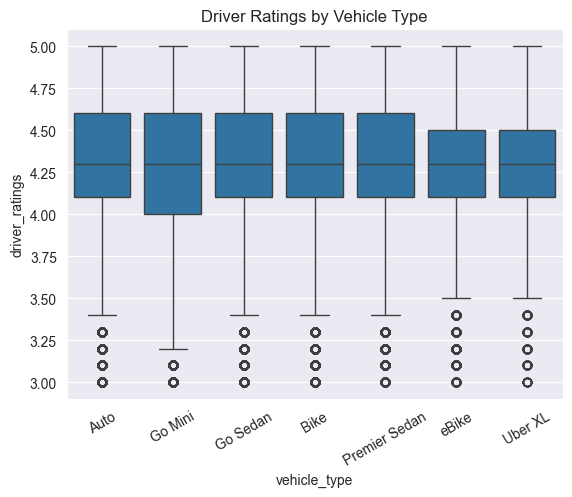

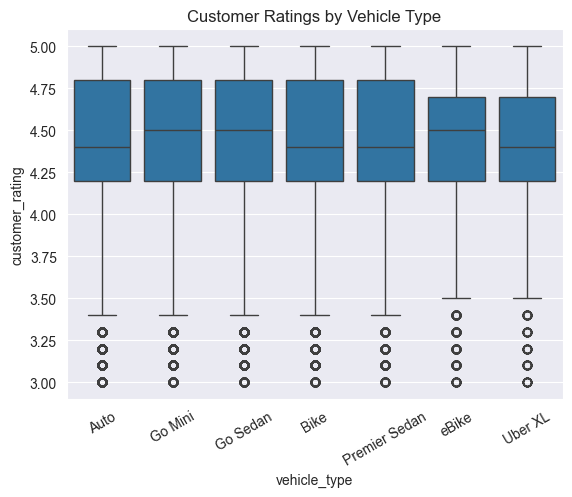

In [121]:
sns.boxplot(x="vehicle_type", y="driver_ratings", data=completed, order=completed["vehicle_type"].value_counts().index)
plt.title("Driver Ratings by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

sns.boxplot(x="vehicle_type", y="customer_rating", data=completed, order=completed["vehicle_type"].value_counts().index)
plt.title("Customer Ratings by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

#### Summary
Autos, Go Mini, and Go Sedan dominate rides but also lead in cancellations (driver-led).

Distance distribution looks artificially uniform (~25 km median across all types): system bias likely.

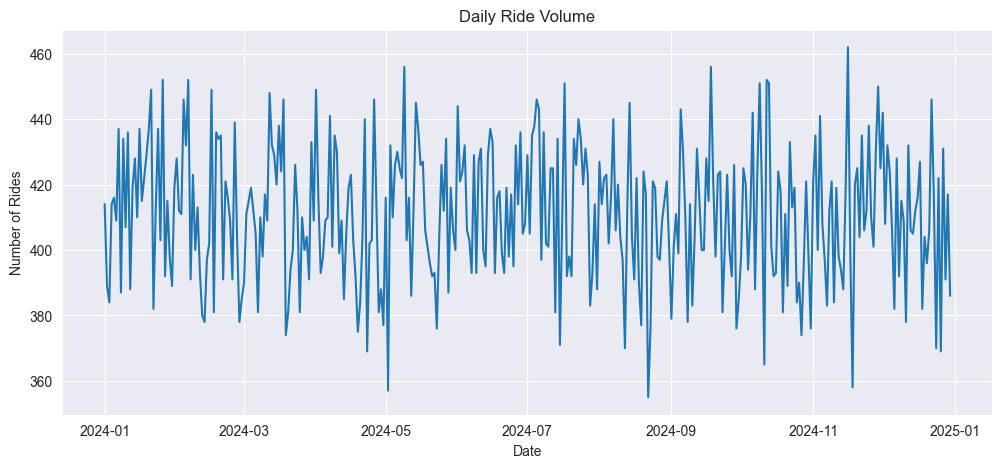

In [122]:
ts = data.groupby(data["datetime"].dt.date).size()

plt.figure(figsize=(12,5))
ts.plot()
plt.title("Daily Ride Volume")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.show()

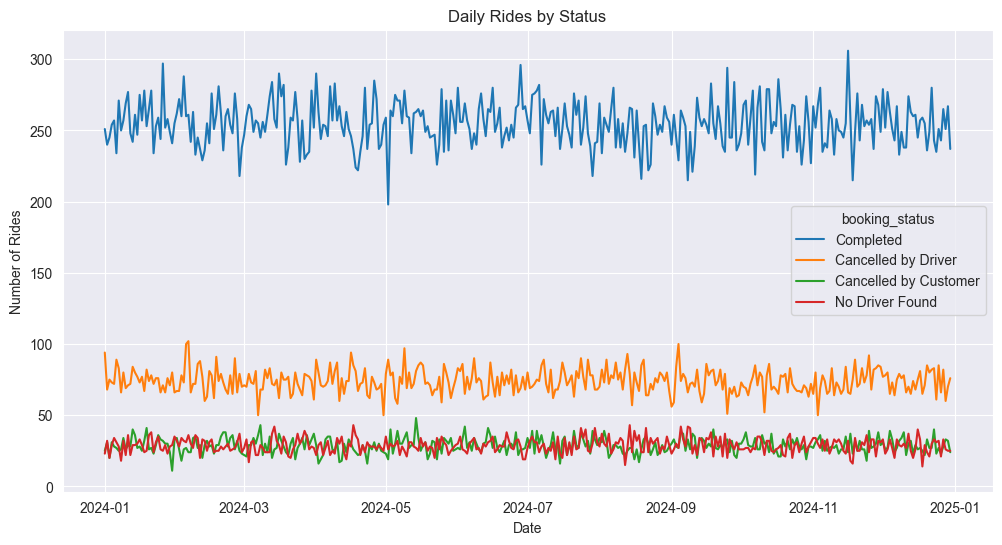

In [123]:
daily = data.groupby([data["datetime"].dt.date, "booking_status"]).size().unstack(fill_value=0)

daily[["Completed","Cancelled by Driver","Cancelled by Customer","No Driver Found"]].plot(figsize=(12,6))
plt.title("Daily Rides by Status")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.show()

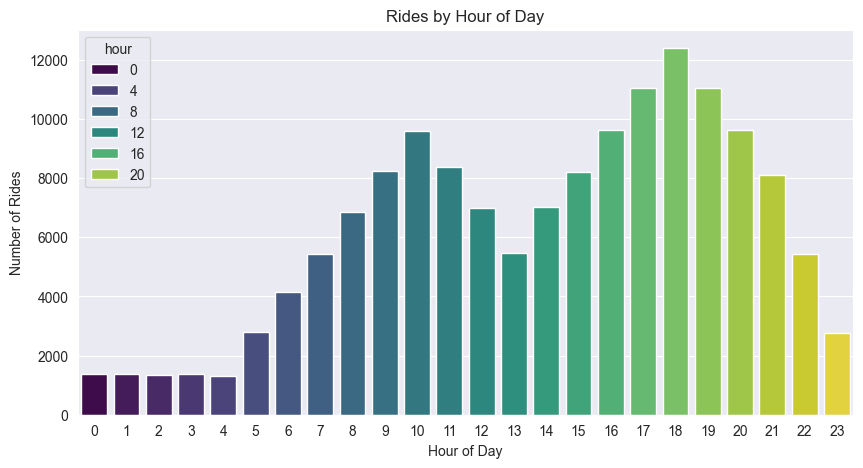

In [124]:
data["hour"] = data["datetime"].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=data, order=range(24), palette="viridis", hue="hour")
plt.title("Rides by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.show()

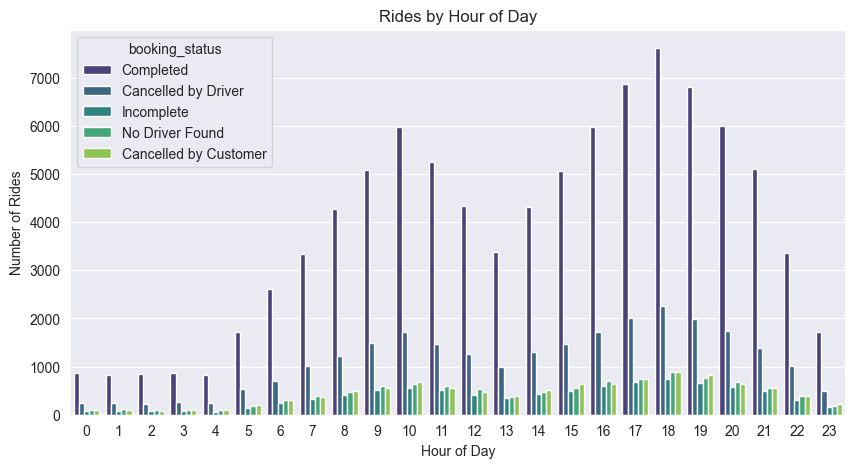

In [125]:
data["hour"] = data["datetime"].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=data, order=range(24), palette="viridis", hue="booking_status")
plt.title("Rides by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.show()

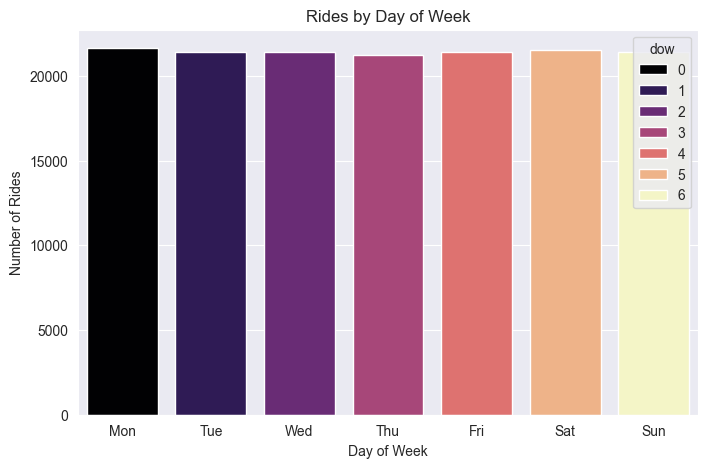

In [126]:
data["dow"] = data["datetime"].dt.dayofweek
dow_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

plt.figure(figsize=(8,5))
sns.countplot(x="dow", data=data, order=range(7), palette="magma", hue="dow")
plt.title("Rides by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(range(7), dow_labels)
plt.show()

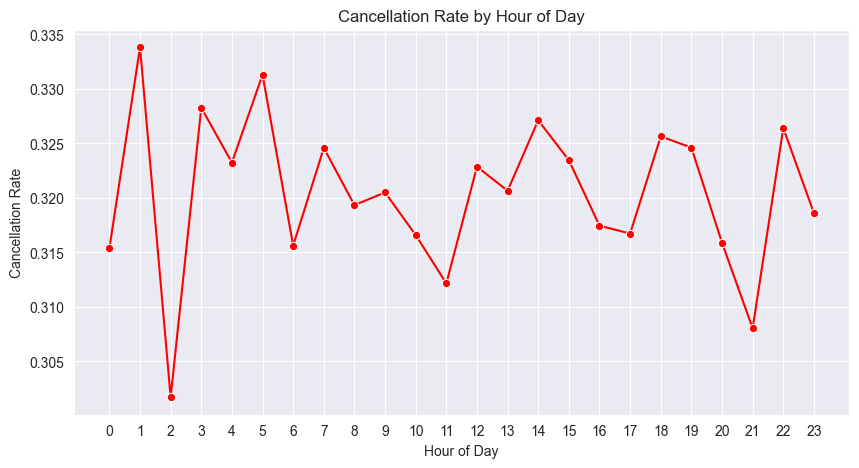

In [127]:
cancel_mask = data["booking_status"].isin(["Cancelled by Driver","Cancelled by Customer","No Driver Found"])
data["is_cancel"] = cancel_mask.astype(int)

hourly = data.groupby(data["datetime"].dt.hour)["is_cancel"].agg(["mean","count"])

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly["mean"], marker="o", color="red")
plt.title("Cancellation Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Cancellation Rate")
plt.xticks(range(24))
plt.show()

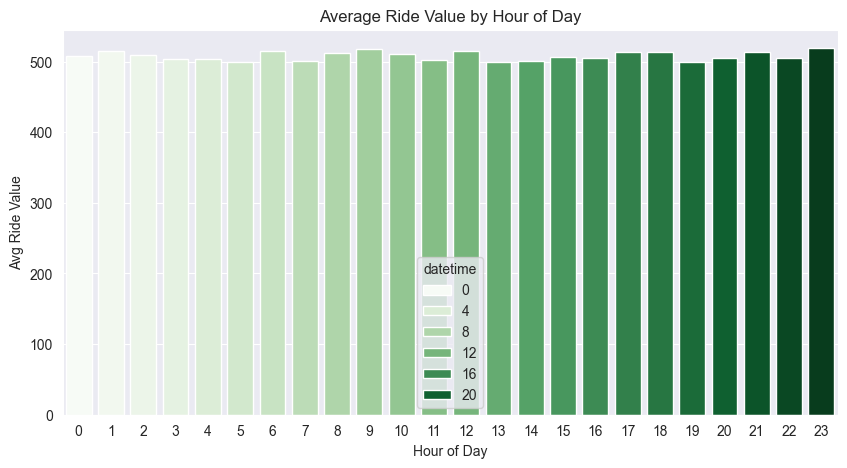

In [128]:
hourly_val = (data[data["booking_status"]=="Completed"]
              .groupby(data["datetime"].dt.hour)["booking_value"].mean())

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_val.index, y=hourly_val.values, palette="Greens", hue=hourly_val.index)
plt.title("Average Ride Value by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Ride Value")
plt.xticks(range(24))
plt.show()

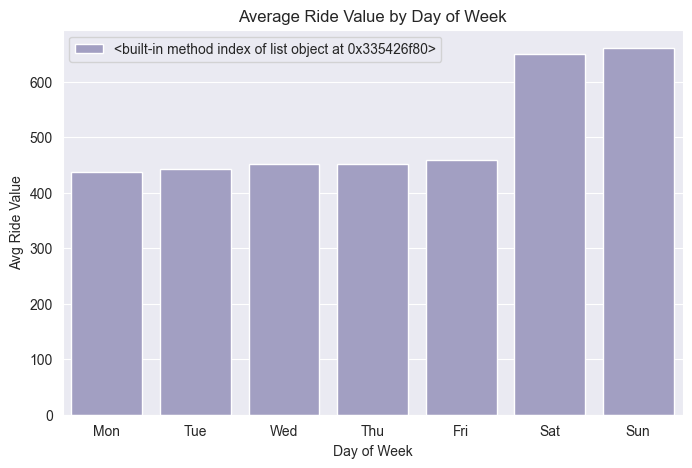

In [129]:
dow_val = (data[data["booking_status"]=="Completed"]
           .groupby(data["datetime"].dt.dayofweek)["booking_value"].mean())
dow_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

plt.figure(figsize=(8,5))
sns.barplot(x=dow_val.index, y=dow_val.values, palette="Purples", hue=dow_labels.index)
plt.title("Average Ride Value by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Ride Value")
plt.xticks(range(7), dow_labels)
plt.show()

- Peak demand sits between 8–11 AM and 5–8 PM, aligning with commute hours.
- Average ride value is stable across the day (~500), with only slight upticks mid-morning and late evening.
- Weekend rides are more lucrative: Sat–Sun average ride value is ~40–50% higher than weekdays.

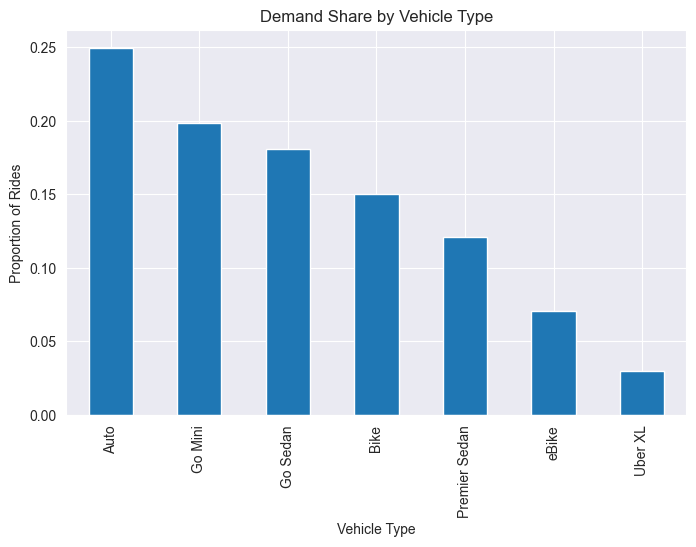

In [130]:
plt.figure(figsize=(8,5))
data["vehicle_type"].value_counts(normalize=True).plot(kind="bar")
plt.title("Demand Share by Vehicle Type")
plt.ylabel("Proportion of Rides")
plt.xlabel("Vehicle Type")
plt.show()


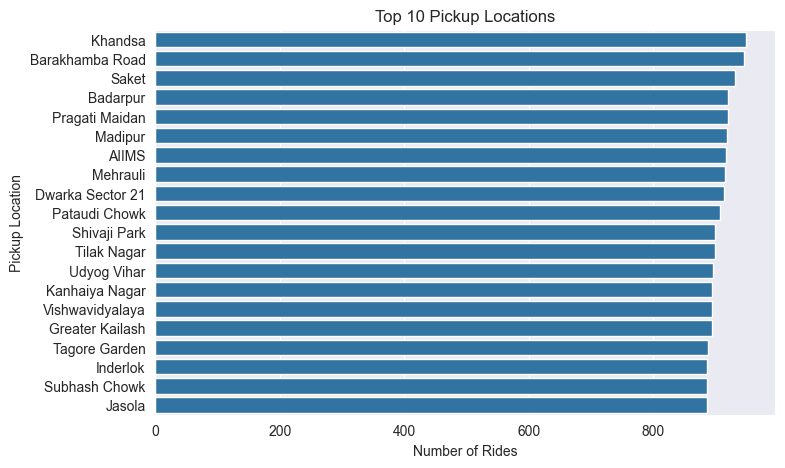

In [131]:
top_pickups = data["pickup_location"].value_counts().head(20)

plt.figure(figsize=(8,5))
sns.barplot(y=top_pickups.index, x=top_pickups.values)
plt.title("Top 10 Pickup Locations")
plt.xlabel("Number of Rides")
plt.ylabel("Pickup Location")
plt.show()

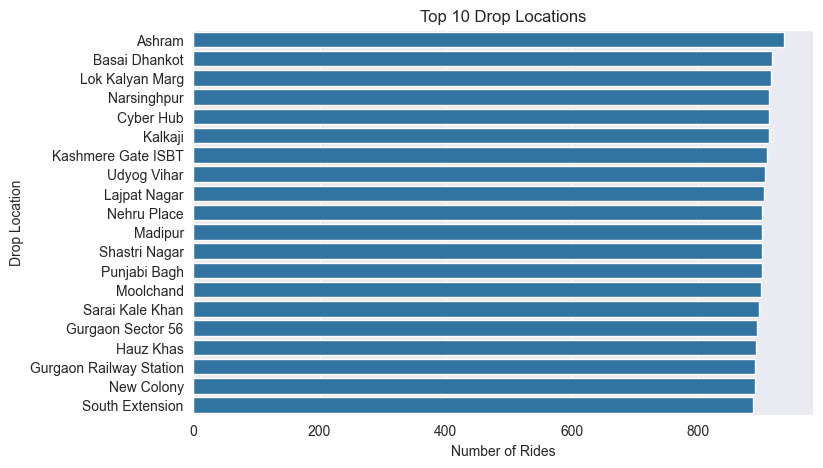

In [132]:
top_drops = data["drop_location"].value_counts().head(20)

plt.figure(figsize=(8,5))
sns.barplot(y=top_drops.index, x=top_drops.values)
plt.title("Top 10 Drop Locations")
plt.xlabel("Number of Rides")
plt.ylabel("Drop Location")
plt.show()

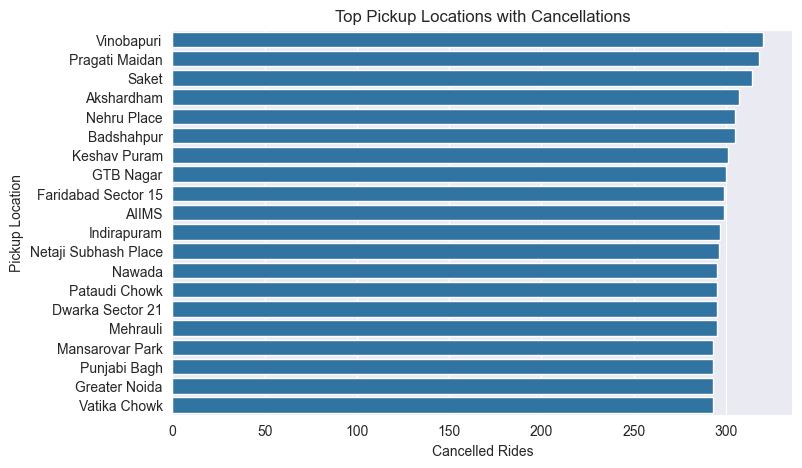

In [133]:
cancel_status = ["Cancelled by Driver","Cancelled by Customer","No Driver Found"]
cancel_locs = (data[data["booking_status"].isin(cancel_status)]
               ["pickup_location"].value_counts().head(20))

plt.figure(figsize=(8,5))
sns.barplot(y=cancel_locs.index, x=cancel_locs.values)
plt.title("Top Pickup Locations with Cancellations")
plt.xlabel("Cancelled Rides")
plt.ylabel("Pickup Location")
plt.show()

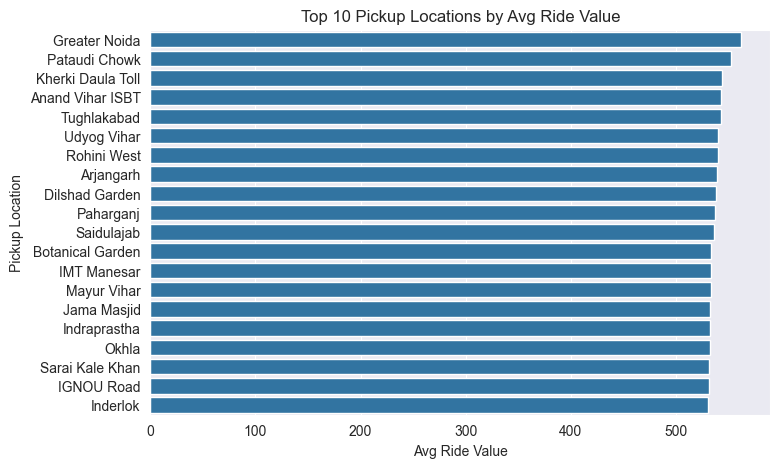

In [134]:
value_by_pickup = (data[data["booking_status"]=="Completed"]
                   .groupby("pickup_location")["booking_value"]
                   .mean()
                   .sort_values(ascending=False)
                   .head(20))

plt.figure(figsize=(8,5))
sns.barplot(y=value_by_pickup.index, x=value_by_pickup.values)
plt.title("Top 10 Pickup Locations by Avg Ride Value")
plt.xlabel("Avg Ride Value")
plt.ylabel("Pickup Location")
plt.show()

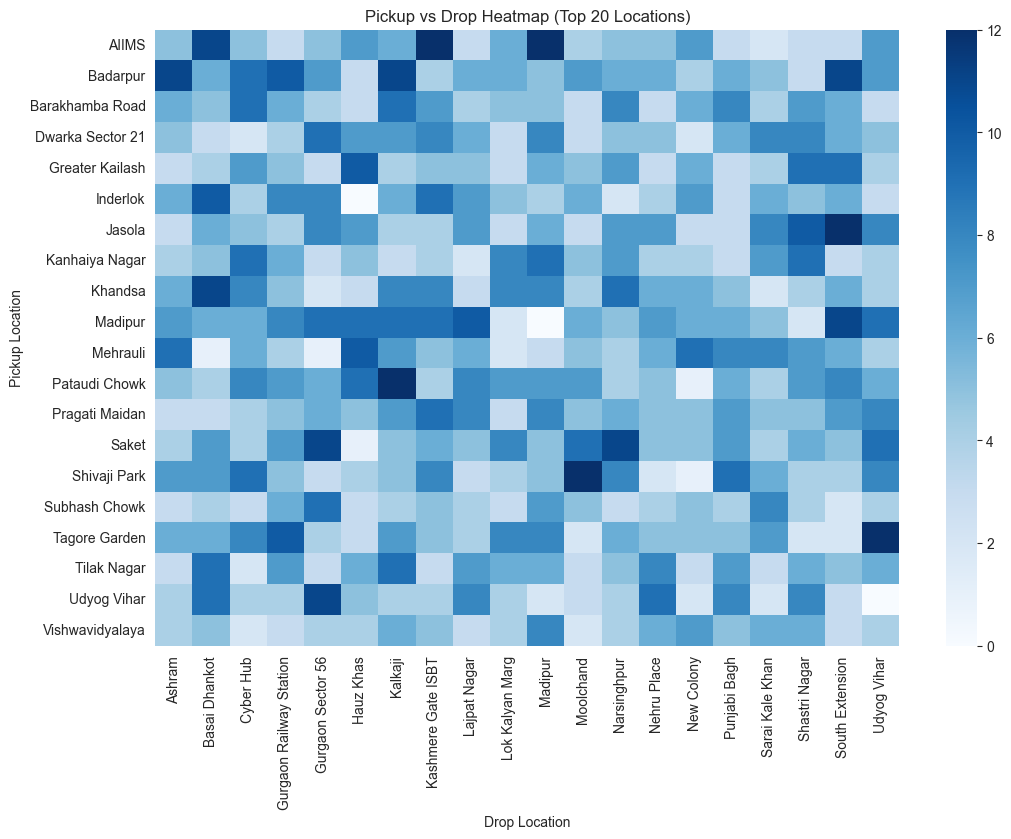

In [135]:
top_pickups = data["pickup_location"].value_counts().head(20).index
top_drops = data["drop_location"].value_counts().head(20).index

cross = (data[data["pickup_location"].isin(top_pickups) & data["drop_location"].isin(top_drops)]
         .groupby(["pickup_location","drop_location"])
         .size()
         .unstack(fill_value=0))

plt.figure(figsize=(12,8))
sns.heatmap(cross, cmap="Blues", annot=False, cbar=True)
plt.title("Pickup vs Drop Heatmap (Top 20 Locations)")
plt.xlabel("Drop Location")
plt.ylabel("Pickup Location")
plt.show()

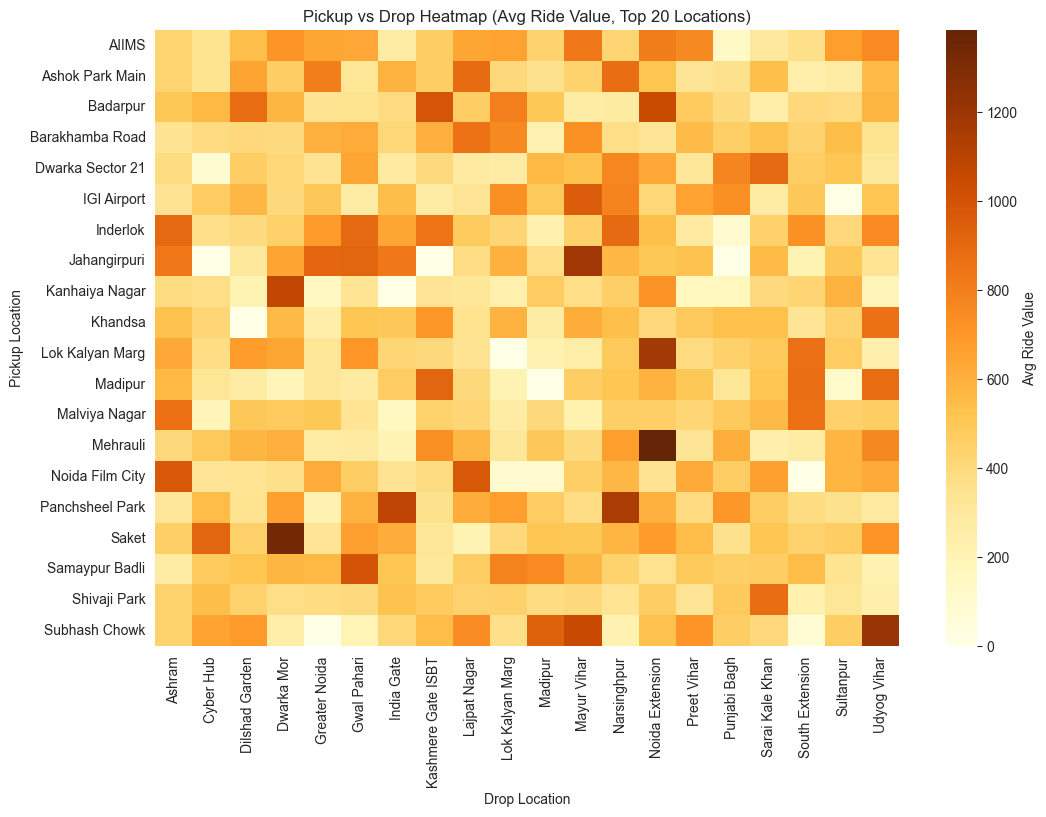

In [136]:
completed = data[data["booking_status"]=="Completed"]

# Limit to top 15 pickups & drops
top_pickups = completed["pickup_location"].value_counts().head(20).index
top_drops   = completed["drop_location"].value_counts().head(20).index

# Build cross table: average fare by route
cross_val = (completed[completed["pickup_location"].isin(top_pickups) &
                       completed["drop_location"].isin(top_drops)]
             .groupby(["pickup_location","drop_location"])["booking_value"]
             .mean()
             .unstack(fill_value=0))

plt.figure(figsize=(12,8))
sns.heatmap(cross_val, cmap="YlOrBr", annot=False, cbar_kws={'label': 'Avg Ride Value'})
plt.title("Pickup vs Drop Heatmap (Avg Ride Value, Top 20 Locations)")
plt.xlabel("Drop Location")
plt.ylabel("Pickup Location")
plt.show()

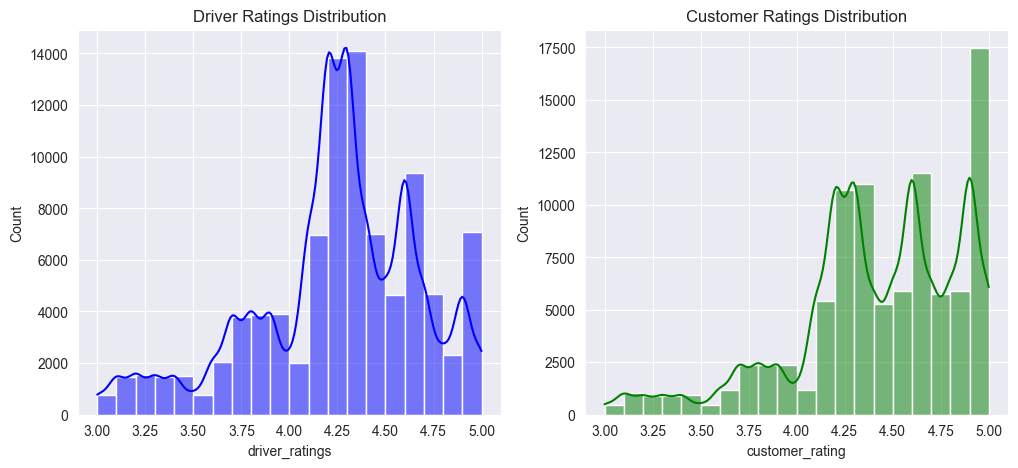

               driver_ratings  customer_rating
vehicle_type                                  
Uber XL              4.238340         4.404851
Premier Sedan        4.234865         4.403457
Auto                 4.232369         4.402000
Go Sedan             4.231812         4.409996
Bike                 4.230056         4.403940
Go Mini              4.227694         4.404297
eBike                4.225614         4.403954


In [137]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(completed["driver_ratings"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Driver Ratings Distribution")

sns.histplot(completed["customer_rating"], bins=20, kde=True, ax=axes[1], color="green")
axes[1].set_title("Customer Ratings Distribution")

plt.show()

ratings_by_vehicle = completed.groupby("vehicle_type")[["driver_ratings", "customer_rating"]].mean().sort_values("driver_ratings", ascending=False)
print(ratings_by_vehicle)

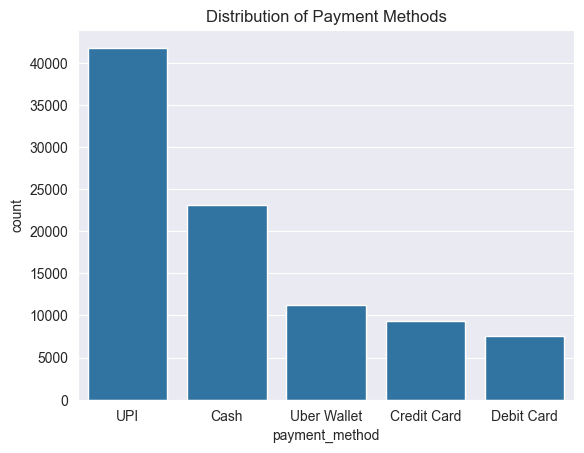

payment_method
Credit Card    510.060837
Cash           508.612572
UPI            508.547856
Uber Wallet    505.895949
Debit Card     505.856365
Name: booking_value, dtype: float64


In [138]:
sns.countplot(x="payment_method", data=completed, order=completed["payment_method"].value_counts().index)
plt.title("Distribution of Payment Methods")
plt.show()

avg_value = completed.groupby("payment_method")["booking_value"].mean().sort_values(ascending=False)
print(avg_value)


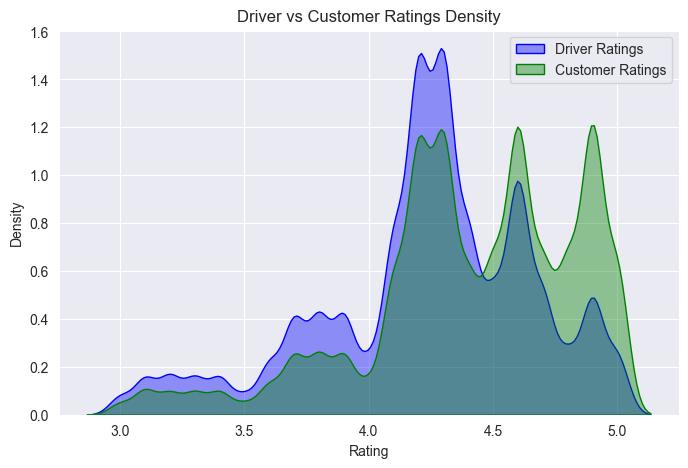

In [139]:
plt.figure(figsize=(8,5))
sns.kdeplot(completed["driver_ratings"].dropna(), fill=True, color="blue", alpha=0.4, label="Driver Ratings")
sns.kdeplot(completed["customer_rating"].dropna(), fill=True, color="green", alpha=0.4, label="Customer Ratings")

plt.title("Driver vs Customer Ratings Density")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.show()

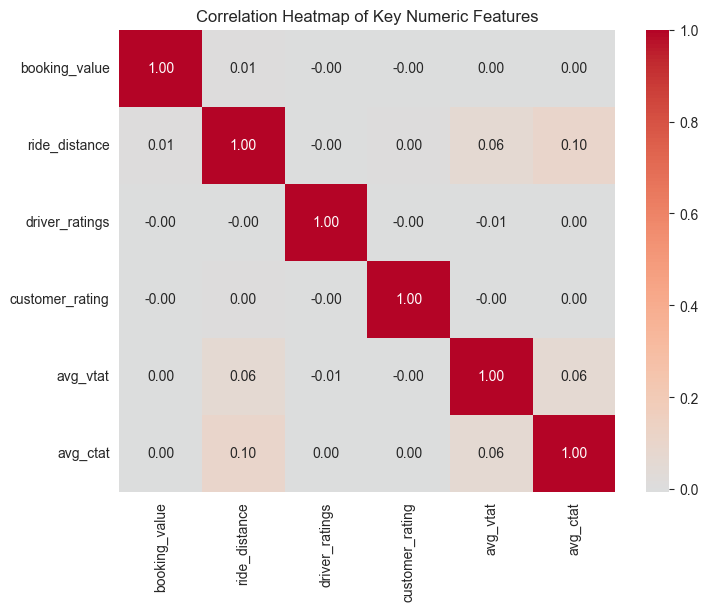

In [140]:
num_cols = ["booking_value", "ride_distance", "driver_ratings", "customer_rating", "avg_vtat", "avg_ctat"]

corr = data[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()

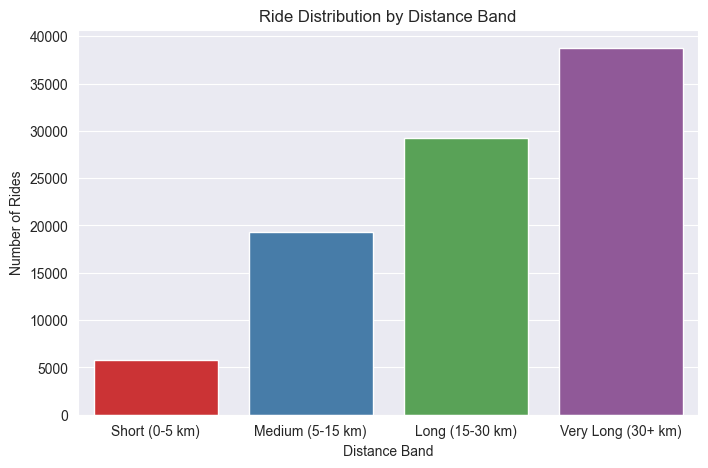

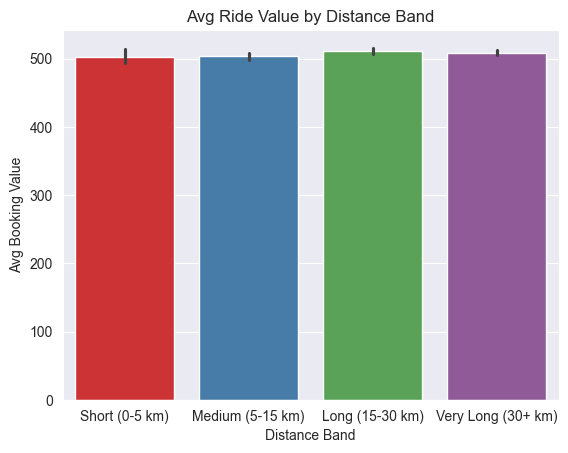

In [141]:
completed = data[data["booking_status"]=="Completed"].copy()

# Create bins
bins = [0, 5, 15, 30, completed["ride_distance"].max()]
labels = ["Short (0-5 km)", "Medium (5-15 km)", "Long (15-30 km)", "Very Long (30+ km)"]

completed["distance_band"] = pd.cut(completed["ride_distance"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.countplot(x="distance_band", data=completed, order=labels, palette="Set1", hue="distance_band")
plt.title("Ride Distribution by Distance Band")
plt.xlabel("Distance Band")
plt.ylabel("Number of Rides")
plt.show()

sns.barplot(x="distance_band", y="booking_value", data=completed, order=labels, palette="Set1", hue="distance_band")
plt.title("Avg Ride Value by Distance Band")
plt.xlabel("Distance Band")
plt.ylabel("Avg Booking Value")
plt.show()

#### Summary
- Broken fare logic: Either the fare system doesn’t scale with distance (fixed pricing, caps, or flat tokens).
- Data integrity issue: booking_value might not represent true fare (could be placeholder/test values).
- Business implication: if this reflects real ops, longer trips are massively underpriced, killing margins.

## Predictive Modelling (NEED UPDATE)

To predict ride cancellations, the key is to only use information that’s actually available before the ride outcome is known. Features generated after a ride succeeds (distance, fare, ratings, payment details) create data leakage

#### Candidate Features (Pre-Ride)
- hour – Time of day can influence demand and cancellations.
- dow – Day-of-week patterns (weekend vs weekday) affect reliability.
- vehicle_type – Certain vehicle classes may be more prone to cancellation.
- pickup_location – Some areas may see higher cancellation rates.
- drop_location – Destination can influence whether drivers accept or cancel.

#### Features to Drop (Leakage or Post-Outcome Data)
- ride_distance – Only known after ride completion.
- booking_value – Derived from distance/fare; not known if ride is canceled.
- avg_vtat / avg_ctat – Completion metrics that depend on actual ride status.
- driver_ratings / customer_rating – Often only collected post-ride or biased by outcomes.
- payment_method – Missing when rides are canceled, so acts as a proxy for the label.


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error


from xgboost import XGBRegressor
import xgboost as xgb




In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   booking_id                         150000 non-null  object        
 1   booking_status                     150000 non-null  object        
 2   customer_id                        150000 non-null  object        
 3   vehicle_type                       150000 non-null  object        
 4   pickup_location                    150000 non-null  object        
 5   drop_location                      150000 non-null  object        
 6   avg_vtat                           139500 non-null  float64       
 7   avg_ctat                           102000 non-null  float64       
 8   cancelled_rides_by_customer        10500 non-null   float64       
 9   reason_for_cancelling_by_customer  10500 non-null   object        
 10  cancelled_rides_by_d

In [145]:
data_model = data[data["booking_value"].notna() & data["ride_distance"].notna()].copy()
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102000 entries, 1 to 149999
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   booking_id                         102000 non-null  object        
 1   booking_status                     102000 non-null  object        
 2   customer_id                        102000 non-null  object        
 3   vehicle_type                       102000 non-null  object        
 4   pickup_location                    102000 non-null  object        
 5   drop_location                      102000 non-null  object        
 6   avg_vtat                           102000 non-null  float64       
 7   avg_ctat                           102000 non-null  float64       
 8   cancelled_rides_by_customer        0 non-null       float64       
 9   reason_for_cancelling_by_customer  0 non-null       object        
 10  cancelled_rides_by_driver

In [146]:
y = data_model["booking_value"]
y.shape

(102000,)

In [147]:
drop_cols = [
    "booking_id", "customer_id", "booking_status", "reason_for_cancelling_by_customer",
    "driver_cancellation_reason", "incomplete_rides_reason",
    "driver_ratings", "customer_rating",
    "is_cancel", "booking_value", 'cancelled_rides_by_customer', 'cancelled_rides_by_driver', 'incomplete_rides', 'datetime'
]
X = data_model.drop(columns=drop_cols, errors="ignore")
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
Index: 102000 entries, 1 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   vehicle_type     102000 non-null  object 
 1   pickup_location  102000 non-null  object 
 2   drop_location    102000 non-null  object 
 3   avg_vtat         102000 non-null  float64
 4   avg_ctat         102000 non-null  float64
 5   ride_distance    102000 non-null  float64
 6   payment_method   102000 non-null  object 
 7   hour             102000 non-null  int32  
 8   dow              102000 non-null  int32  
dtypes: float64(3), int32(2), object(4)
memory usage: 7.0+ MB


(102000, 9)

In [148]:
numeric_features = X.select_dtypes(include=["float64", "int32", "int64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['avg_vtat', 'avg_ctat', 'ride_distance', 'hour', 'dow']
Categorical: ['vehicle_type', 'pickup_location', 'drop_location', 'payment_method']


In [149]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numeric_features),
        ("cat", cat_transformer, categorical_features)
    ]
)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [151]:
baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)

print("Baseline Linear Regression")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Baseline Linear Regression
MAE : 280.7898809867961
RMSE: 389.9377896666373


In [152]:
xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost baseline")
print("MAE :", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost baseline
MAE : 278.83057575749416
RMSE: 388.86397874542206


In [153]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge())
])

param_grid_ridge = {
    "model__alpha": [0.1, 1.0, 10.0, 50.0, 100.0]
}

grid_ridge = GridSearchCV(
    ridge, param_grid_ridge,
    cv=5, scoring="neg_mean_absolute_error",
    n_jobs=-1, verbose=2
)

grid_ridge.fit(X_train, y_train)
print("Best Ridge params:", grid_ridge.best_params_)

y_pred_ridge = grid_ridge.predict(X_test)
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................................model__alpha=1.0; total time=   0.2s
[CV] END ...................................model__alpha=0.1; total time=   0.2s
[CV] END ...................................model__alpha=0.1; total time=   0.2s
[CV] END ...................................model__alpha=0.1; total time=   0.2s
[CV] END ...................................model__alpha=0.1; total time=   0.2s
[CV] END ...................................model__alpha=0.1; total time=   0.2s
[CV] END ...................................model__alpha=1.0; total time=   0.2s
[CV] END ...................................model__alpha=1.0; total time=   0.2s
[CV] END ...................................model__alpha=1.0; total time=   0.2s
[CV] END ...................................model__alpha=1.0; total time=   0.2s
[CV] END ..................................model__alpha=10.0; total time=   0.2s
[CV] END ..................................model_

In [154]:
param_grid_xgb = {
    "model__n_estimators": [200, 500],
    "model__max_depth": [4, 6, 8],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__subsample": [0.7, 0.9],
    "model__colsample_bytree": [0.7, 0.9],
    "model__min_child_weight": [1, 5, 10]
}

grid_xgb = GridSearchCV(
    xgb, param_grid_xgb,
    cv=3, scoring="neg_mean_absolute_error",
    n_jobs=-1, verbose=2
)

grid_xgb.fit(X_train, y_train)
print("Best XGBoost params:", grid_xgb.best_params_)

y_pred_xgb_grid = grid_xgb.predict(X_test)
print("Tuned XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb_grid))
print("Tuned XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb_grid)))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.9; total time=   0.6s
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7; total time=   0.7s
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7; total time=   0.7s
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7; total time=   0.7s
[CV] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.9; total time=   0.7s
[CV] END model__colsample_bytree=0.7, model__le

                                            feature  importance
4                                          num__dow    0.096572
25                    cat__pickup_location_Badarpur    0.012243
49                   cat__pickup_location_Ghaziabad    0.011650
119  cat__pickup_location_New Delhi Railway Station    0.010975
160                   cat__pickup_location_Shahdara    0.010100
131              cat__pickup_location_Paschim Vihar    0.009966
78                   cat__pickup_location_Janakpuri    0.008483
309                  cat__drop_location_Patel Chowk    0.008320
272                    cat__drop_location_Lal Quila    0.007977
358                 cat__drop_location_Vatika Chowk    0.007751
99                     cat__pickup_location_MG Road    0.007686
233      cat__drop_location_Gurgaon Railway Station    0.006993
169              cat__pickup_location_Subhash Nagar    0.006964
319                  cat__drop_location_Rajiv Chowk    0.006889
105            cat__pickup_location_Mans

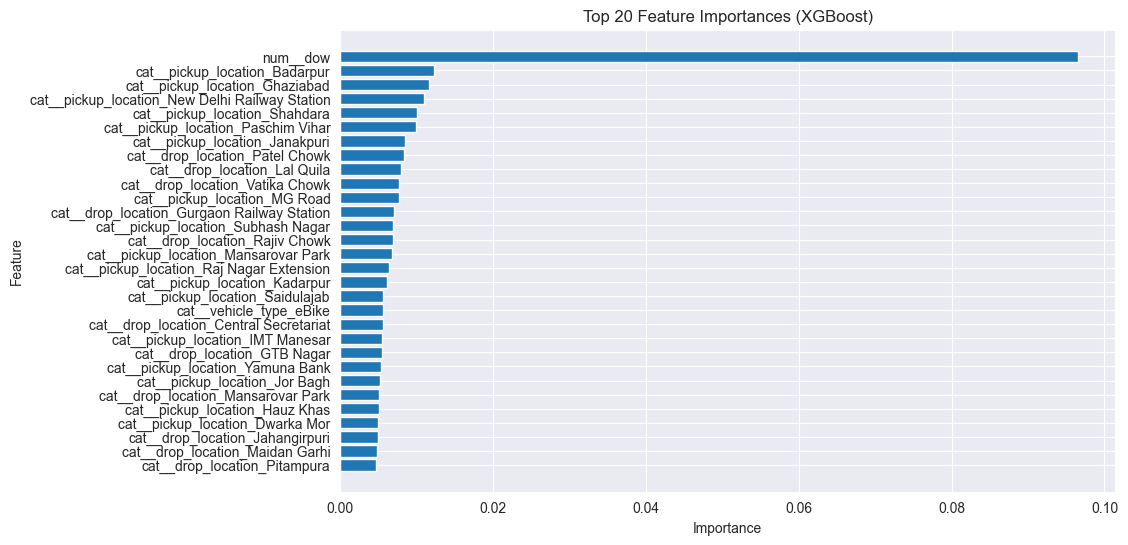

In [156]:
best_xgb = grid_xgb.best_estimator_

# Extract trained booster
booster = best_xgb.named_steps["model"]

# Get feature names from the preprocessor
feature_names = best_xgb.named_steps["preprocessor"].get_feature_names_out()

# Create DataFrame of feature importance
importances = booster.feature_importances_
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feat_imp.head(20))

# Plot top 20
plt.figure(figsize=(10,6))
plt.barh(feat_imp["feature"].head(30)[::-1], feat_imp["importance"].head(30)[::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

### Project Closure
Model Performance:
- Baseline Linear Regression: MAE ≈ 280, RMSE ≈ 390
- Default XGBoost: MAE ≈ 279, RMSE ≈ 389
- Tuned XGBoost: MAE ≈ 276, RMSE ≈ 386

The tuned XGBoost model improved error rates by only ~1% over the linear baseline.

This indicates that model complexity is not the limiting factor. The bottleneck lies in the dataset and features.

#### Feature Importance Insights
Analysis of tuned XGBoost feature importances shows:
- Day of Week (dow) is the single most influential predictor (~10% importance).
- Pickup and Drop Locations dominate the remaining importance, highlighting lane-based or zone-based fare rules rather than pure distance-based pricing.
- Vehicle Type and ride distance had very low importance once pickup/drop were encoded, suggesting that fares are heavily adjusted by location and temporal context, not raw kilometers.

This pattern reflects Uber’s real-world pricing system: base fares, minimums, city-specific zoning, and surge/demand multipliers not directly visible in the dataset.